In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

## Gather

In [2]:
# Read in csv file as a Pandas DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [31]:
# Use requests library to download tsv file from a website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)


In [3]:
# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key = '1pma8cudG7QqMTGFHDuZ2MQ57'
consumer_secret = 'vKJcNZq8tSGUlDCl5PRfLZtJzIC12XHxVWXRqpryZLquCfKkRs'
access_token = '987434190768455680-XYjyl50MBx7XOGELsADdNzzRTcPkV0x'
access_secret = '9Owj2wHIOgVKSA4GmMmkGVhnkaiEGUStxyoEIQvC3LVHw'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 780
Rate limit reached. Sleeping for: 782


In [6]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [7]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [8]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assess

In [9]:
# View first 10 rows of twitter_archive DataFrame
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# View info of twitter_archive DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# View first 10 rows of image_predictions DataFrame
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
# View info of image_predictions DataFrame
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# View first 5 rows of tweet_info DataFrame
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8560,38696
1,892177421306343426,6294,33168
2,891815181378084864,4176,24966
3,891689557279858688,8683,42081
4,891327558926688256,9453,40231


In [14]:
# View info of tweet_info DataFrame
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [15]:
# Check value counts of 'name' column 
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Daisy          7
Buddy          7
Toby           7
Bailey         7
Jax            6
Milo           6
Oscar          6
Koda           6
Leo            6
Rusty          6
Bella          6
Jack           6
Scout          6
Stanley        6
Dave           6
Sunny          5
            ... 
Noah           1
Kobe           1
Ed             1
Tango          1
Meera          1
Jimbo          1
Julius         1
Coopson        1
Danny          1
Cal            1
Schnozz        1
Enchilada      1
Rufio          1
Kallie         1
Jameson        1
Simba          1
Autumn         1
Aiden          1
Snicku         1
Zooey          1
Fillup         1
Kenzie         1
Taz            1
Kramer         1
Aja            1
Pinot          1
Pete           1
Carbon        

In [16]:
# Sort values of 'name' column alphabetically. Lowercase names are likely not legit.
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [17]:
# View rows where the value of 'name' is lowercase - indicates that it is not an actual name
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [18]:
# Check if dog names are in text body for rows where names are in lowercase
# Search 'text' for phrases such as 'named' or 'name is'
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None


In [19]:
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [20]:
# Check a row where the dog name was written has 'O' to see if text contains name
# Looks like the dog name is actually O'Malley
twitter_archive[twitter_archive.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [21]:
# Check for rows with the text column containing #.#/#, indicating a decimal for the ratings
# Doesn't seem to be reflected in the 'rating_numerator' column
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


### Quality

- Tweets with no image
- There are repeated tweets (retweets)
- Cutoff 'text' content
- Incorrect dog names
- Missing value in 'name' column
- Ratings with decimal not showing full float
- Extra character after '&' in text
- Sources are hard to read
- Erroneous datatypes (timestamp, source, dog stages etc)

### Tidiness

- Dog 'stage' variable in four columns instead of one: doggo, floofer, pupper, puppo
- Join 'tweet_info' and 'image_prediction' to 'twitter_archive' for master dataframe

## Clean

In [22]:
# Create copies of original DataFrames to work off of
archive_clean = twitter_archive.copy()
images_clean = image_predictions.copy()
info_clean = tweet_info.copy()

#### Define

Remove individual dog stage columns and create dog stage variable.

#### Code

In [23]:
# Create 'dog_stage' variable 
# Extract the dog stage variables from the text column if available 
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)


In [24]:
# Drop dog stage columns to clean up dataframe
dropped_columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean = archive_clean.drop(dropped_columns, axis=1)

#### Test 

In [25]:
# Value counts of new column 'dog_stage'
archive_clean['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [26]:
archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


#### Define

Merge all 3 tables to create one dataframe. 

#### Code

In [27]:
archive_clean = pd.merge(left=archive_clean, right=info_clean, 
                         left_on='tweet_id', right_on ='id', how='inner')

In [28]:
archive_clean = archive_clean.merge(images_clean, 
                                    on='tweet_id', how='inner')

In [29]:
archive_clean = archive_clean.drop('id', axis=1)

#### Test

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
dog_stage                     338 non-null object
retweet_count                 2069 non-null int64
favorite_count                2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non

#### Define

Remove columns that are related to retweets.

#### Code

In [31]:
# Drop columns related to retweets
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean = archive_clean.drop(columns, axis=1)

#### Test

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 2069 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2069 non-null object
source                   2069 non-null object
text                     2069 non-null object
expanded_urls            2069 non-null object
rating_numerator         2069 non-null int64
rating_denominator       2069 non-null int64
name                     2069 non-null object
dog_stage                338 non-null object
retweet_count            2069 non-null int64
favorite_count           2069 non-null int64
jpg_url                  2069 non-null object
img_num                  2069 non-null int64
p1                       2069 non-null object
p1_conf                  2069 non-null float64
p1_dog                   2069 non-null bool
p2                       2069 non-null object
p2_conf                  2069

#### Define

Display the full 'text' of each tweet.

#### Code

In [33]:
# Use Panda's set_option feature to display full 'text' length. 
pd.set_option('display.max_colwidth', -1)

#### Test

In [34]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
612,777641927919427584,NaN,NaN,2016-09-18 22:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS,"https://twitter.com/dog_rates/status/750429297815552001/photo/1,https://twitter.com/dog_rates/status/750429297815552001/photo/1,https://twitter.com/dog_rates/status/750429297815552001/photo/1,https://twitter.com/dog_rates/status/750429297815552001/photo/1",12,10,Arnie,...,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1071,708356463048204288,NaN,NaN,2016-03-11 18:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. That is his castle. He protects it with his life. He's also squishy af. 10/10 would squish softly https://t.co/oSuEGw0BhX,"https://twitter.com/dog_rates/status/708356463048204288/photo/1,https://twitter.com/dog_rates/status/708356463048204288/photo/1",10,10,Oliver,...,2,pug,0.871283,True,French_bulldog,0.041820,True,bath_towel,0.015228,False
379,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Akumi. It's his birthday. He received many lickable gifts. 11/10 happy h*ckin birthday https://t.co/gd9UlLOCQ0,"https://twitter.com/dog_rates/status/815736392542261248/photo/1,https://twitter.com/dog_rates/status/815736392542261248/photo/1,https://twitter.com/dog_rates/status/815736392542261248/photo/1,https://twitter.com/dog_rates/status/815736392542261248/photo/1",11,10,Akumi,...,3,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True


#### Define

Change incorrect dog names.

#### Code

In [35]:
# Save locations for:
# Rows that have lowercase names
# Rows that have lowercase names with "name is" in 'text' body
# Rows that have lowercase names with "named" in 'text' body
named_row = archive_clean.loc[(archive_clean['name'].str.islower()) & (archive_clean['text'].str.contains('named'))]
name_is_row = archive_clean.loc[(archive_clean['name'].str.islower()) & (archive_clean['text'].str.contains('name is'))]
lowercase_row = archive_clean.loc[(archive_clean['name'].str.islower())]

# Save above locations as lists
named_list = named_row['text'].tolist()
name_is_list = name_is_row['text'].tolist()
lowercase_list = lowercase_row['text'].tolist()

# For loop to find value after "named" in 'text' body
for entry in named_list:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# For loop to find value after "name is" in 'text' body    
for entry in name_is_list:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# For loop to replace lowercase names with "None"
for entry in lowercase_list:
    mask = archive_clean.text == entry
    name_column = 'name'
    archive_clean.loc[mask, name_column] = "None"

In [36]:
# Replace the previous occurence we found that had "O" for "O'Malley"
archive_clean.name = archive_clean.name.replace("O", "O'Malley")

#### Test

In [37]:
archive_clean.name.value_counts()

None         675
Charlie      11 
Cooper       10 
Penny        10 
Tucker       10 
Oliver       10 
Lucy         10 
Lola         8  
Bo           8  
Sadie        8  
Winston      8  
Daisy        7  
Toby         7  
Stanley      6  
Jax          6  
Dave         6  
Scout        6  
Rusty        6  
Bailey       6  
Milo         6  
Bella        6  
Koda         6  
Louis        5  
Chester      5  
Leo          5  
Alfie        5  
Buddy        5  
Oscar        5  
Larry        5  
Bear         4  
            ..  
Kathmandu    1  
Mutt         1  
Tommy        1  
Margo        1  
Swagger      1  
Baloo        1  
Pete         1  
Monster      1  
Josep        1  
Tessa        1  
Chase        1  
Sky          1  
Katie        1  
Coopson      1  
Cal          1  
Schnozz      1  
Enchilada    1  
Rufio        1  
Jameson      1  
Pinot        1  
Marq         1  
Simba        1  
Autumn       1  
Aiden        1  
Fillup       1  
Kenzie       1  
Taz          1  
Kramer       1

In [38]:
archive_clean.name.sort_values()

843     Abby        
832     Abby        
764     Ace         
1652    Acro        
1105    Adele       
1653    Aiden       
66      Aja         
379     Akumi       
659     Al          
1672    Albert      
707     Albert      
119     Albus       
324     Albus       
915     Aldrick     
1763    Alejandro   
294     Alexander   
987     Alexanderson
384     Alf         
287     Alfie       
1360    Alfie       
527     Alfie       
691     Alfie       
1952    Alfie       
46      Alfy        
1437    Alice       
159     Alice       
1255    Amber       
1112    Ambrose     
1795    Amy         
1910    Amélie      
         ...        
754     Winnie      
631     Winnie      
1850    Winston     
320     Winston     
1032    Winston     
656     Winston     
1554    Winston     
448     Winston     
222     Winston     
804     Winston     
709     Wishes      
322     Wyatt       
143     Wyatt       
1217    Wyatt       
1151    Yoda        
492     Yogi        
38      Yogi 

In [39]:
# Confirm we have no rows with lowercase names in 'name' column
archive_clean.loc[(archive_clean['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
archive_clean[archive_clean.name == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
619,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,...,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


#### Define

Change missing values in 'name' column from 'None' to NaN.

#### Code

In [41]:
archive_clean['name'] = archive_clean['name'].replace('None', np.NaN)

#### Test

In [42]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 2069 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2069 non-null object
source                   2069 non-null object
text                     2069 non-null object
expanded_urls            2069 non-null object
rating_numerator         2069 non-null int64
rating_denominator       2069 non-null int64
name                     1394 non-null object
dog_stage                338 non-null object
retweet_count            2069 non-null int64
favorite_count           2069 non-null int64
jpg_url                  2069 non-null object
img_num                  2069 non-null int64
p1                       2069 non-null object
p1_conf                  2069 non-null float64
p1_dog                   2069 non-null bool
p2                       2069 non-null object
p2_conf                  2069

#### Define

Fix rating numerators and denominators that don't make sense. 

In [43]:
# Find rows with more than one #/# in 'text' body
archive_clean[archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
450,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ","https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12,10,NaN,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
611,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
821,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
872,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
963,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
997,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1013,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1135,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer

In [44]:
# Save the text where the rating numerator and denominators were incorrectly extracted
ratings_to_fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [45]:
# Loop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. As all the
# occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.
for entry in ratings_to_fix:
    mask = archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    archive_clean.loc[mask, column_name2] = 10

#### Test

In [46]:
archive_clean[archive_clean.text.isin(ratings_to_fix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
872,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
963,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
997,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1401,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,...,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
2048,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,NaN,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


#### Define

In [47]:
# Find tweets with decimals in rating in 'text' column
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
553,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
609,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1447,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [48]:
# Change datatype of rating_numerator and denominator to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

In [50]:
# Set correct numerators for specific tweets
archive_clean.loc[(archive_clean['tweet_id'] == 883482846933004288) & (archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
archive_clean.loc[(archive_clean['tweet_id'] == 786709082849828864) & (archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
archive_clean.loc[(archive_clean['tweet_id'] == 778027034220126208) & (archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
archive_clean.loc[(archive_clean['tweet_id'] == 680494726643068929) & (archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### Test

In [51]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
553,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
609,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1447,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


#### Define

Remove tweet row that doesn't contain rating.

#### Code

In [52]:
archive_clean = archive_clean[archive_clean.tweet_id != 810984652412424192]

#### Test

In [53]:
archive_clean[archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Define

Remove extra characters after '&' in 'text' bodies.

#### Code

In [54]:
archive_clean['text'] = archive_clean['text'].str.replace('&amp;', '&')


#### Test

In [55]:
archive_clean[archive_clean.text.str.contains('&amp;')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Define

Change sources to be easier to recognize.

#### Code

In [57]:
# Replace URLs with actual source names
archive_clean['source'] = archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean['source'] = archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive_clean['source'] = archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_clean['source'] = archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [58]:
# Change datatype to category
archive_clean['source'] = archive_clean['source'].astype('category')

#### Test

In [59]:
archive_clean.source.value_counts()

Twitter for iPhone    2027
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64

In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 2068 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2068 non-null object
source                   2068 non-null category
text                     2068 non-null object
expanded_urls            2068 non-null object
rating_numerator         2068 non-null float64
rating_denominator       2068 non-null float64
name                     1393 non-null object
dog_stage                338 non-null object
retweet_count            2068 non-null int64
favorite_count           2068 non-null int64
jpg_url                  2068 non-null object
img_num                  2068 non-null int64
p1                       2068 non-null object
p1_conf                  2068 non-null float64
p1_dog                   2068 non-null bool
p2                       2068 non-null object
p2_conf                

#### Define

Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

#### Code

In [61]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
archive_clean['in_reply_to_status_id'] = archive_clean['in_reply_to_status_id'].astype('str')
archive_clean['in_reply_to_user_id'] = archive_clean['in_reply_to_user_id'].astype('str')

#### Test

In [62]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 2068 non-null object
in_reply_to_status_id    2068 non-null object
in_reply_to_user_id      2068 non-null object
timestamp                2068 non-null datetime64[ns]
source                   2068 non-null category
text                     2068 non-null object
expanded_urls            2068 non-null object
rating_numerator         2068 non-null float64
rating_denominator       2068 non-null float64
name                     1393 non-null object
dog_stage                338 non-null category
retweet_count            2068 non-null int64
favorite_count           2068 non-null int64
jpg_url                  2068 non-null object
img_num                  2068 non-null int64
p1                       2068 non-null object
p1_conf                  2068 non-null float64
p1_dog                   2068 non-null bool
p2                       2068 non-null object
p2_conf   

### Store

In [65]:
# Save clean DataFrame to csv file
archive_clean.to_csv('twitter_archive_master.csv')

### Analyze

In [69]:
# Create copy of dataframe with only the variables of interest
time_df = archive_clean[['timestamp', 'retweet_count', 
                         'favorite_count', 'rating_numerator', 
                         'rating_denominator']].copy()

# Set the index to be the timestamp so time is displayed properly in plots
time_df.set_index('timestamp', inplace=True)

In [70]:
# Create rating_ration variable by dividing the rating numerator by the deonominator to normalize scores
time_df['rating_ratio'] = time_df['rating_numerator']/time_df['rating_denominator']

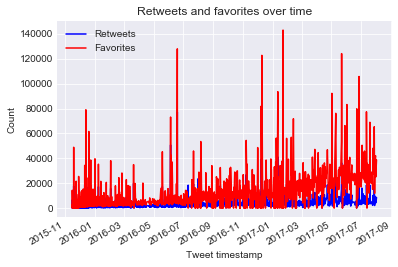

In [75]:
time_df['retweet_count'].plot(color = 'blue', label='Retweets')
time_df['favorite_count'].plot(color = 'red', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

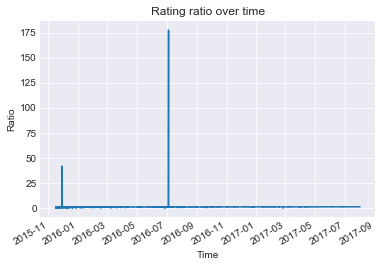

In [78]:
time_df['rating_ratio'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()

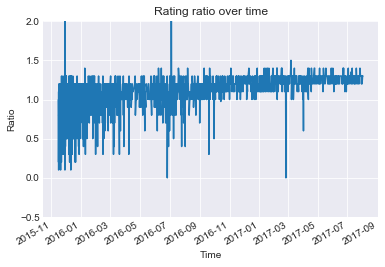

In [79]:
# Limit y axis to zoom in on data and ignore outliers
time_df['rating_ratio'].plot()
plt.ylim(-0.5, 2)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio_zoom.png')
plt.show()